In [2]:
# Imports
import urllib2 as urllib
import json
import pandas
import datetime

In [3]:
# Download Data
oauth_api_key = '14ce3b2e1d6a7a361a167f2d27c7d69209e39df4'
guid = 'INFRA-31368'

url = 'http://miraflores.cloudapi.junar.com/datastreams/invoke/{0:}?auth_key={1:}&output=json_array'
url = url.format(guid, oauth_api_key)

request = urllib.urlopen(url)

textResponse = request.read()

jsonResponse = json.loads(textResponse)

data = jsonResponse['result']

keys = []

dictData = []

for i, row in enumerate(data):
    if i == 0:
        keys = [item.replace('-', '_') for item in row]

    else:
        dictData.append(dict(zip(keys, row)))

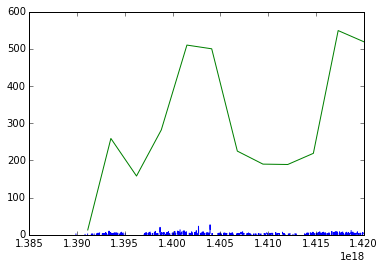

In [52]:
# Making timeseries
dates = [item[u'FECHA'] + ' ' + item[u'HORA'] for item in dictData]

datesAux = []

for i, item in enumerate(dates):
    try:
        datesAux.append(datetime.datetime.strptime(item, '%d/%m/%Y %H:%M'))
    except:
        pass

dates = datesAux


cumF = 0
cumT = ''

datesAux = []
frecuency = []

def cumulativeFrequency(t):
    global cumF
    global cumT
    
    if cumT != t.replace(minute=0):
        if cumT != '':
            datesAux.append(cumT)
            frecuency.append(cumF)
        
        cumT = t.replace(minute=0)
        cumF = 1
    else:
        cumF = cumF + 1

filter(cumulativeFrequency, dates)


rawTimeSeries = pandas.Series([1]*len(dates), index=dates)

dates = datesAux 

timeSeries = pandas.Series(frecuency, index=dates)


timeSeries = timeSeries.asfreq('H')

plot(timeSeries.index, timeSeries.values)

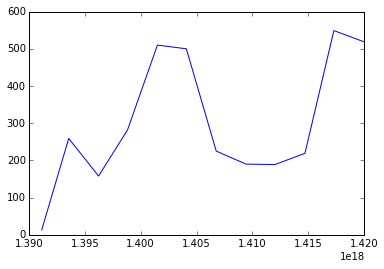

In [51]:
plot(timeSeries.index, timeSeries.values)

In [8]:
dataSet.

2014-01-16 15:54:00    1
2014-01-16 17:23:00    1
2014-01-16 17:37:00    1
2014-01-16 18:58:00    1
2014-01-17 17:22:00    1
2014-01-24 08:05:00    1
2014-01-24 12:23:00    1
2014-01-27 18:57:00    1
2014-01-27 19:19:00    1
2014-01-28 20:47:00    1
2014-01-30 19:52:00    1
2014-01-30 20:10:00    1
2014-01-30 20:14:00    1
2014-02-03 08:11:00    1
2014-02-03 08:18:00    1
2014-02-03 08:30:00    1
2014-02-03 16:17:00    1
2014-02-03 18:25:00    1
2014-02-04 08:57:00    1
2014-02-04 09:03:00    1
2014-02-04 18:33:00    1
2014-02-04 18:39:00    1
2014-02-04 19:53:00    1
2014-02-04 19:56:00    1
2014-02-05 08:15:00    1
2014-02-05 09:50:00    1
2014-02-05 12:11:00    1
2014-02-05 12:22:00    1
2014-02-05 17:05:00    1
2014-02-05 17:10:00    1
                      ..
2014-12-29 11:29:00    1
2014-12-29 11:42:00    1
2014-12-29 11:50:00    1
2014-12-29 12:31:00    1
2014-12-29 12:36:00    1
2014-12-29 12:42:00    1
2014-12-29 12:56:00    1
2014-12-29 13:11:00    1
2014-12-29 16:15:00    1
